Rose S Jose B190839CS

In [1]:
pwd

'C:\\Users\\ROSE S JOSE'

In [2]:
cd D:\Downloads

D:\Downloads


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plot

In [4]:
df = pd.DataFrame(pd.read_excel("Concrete_Data.xls"))
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
mtrain, mtest = train_test_split(df, test_size=0.2)

In [6]:
X_train = mtrain.iloc[:, [0, 3]]
Y_train = mtrain.iloc[:, 8]

In [7]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture)
386,528.0,185.00
517,202.0,206.00
87,286.3,144.70
253,250.0,187.42
136,389.9,145.90


In [8]:
Y_train.head()

386    56.833507
517    15.069975
87     24.400556
253    42.347616
136    74.497882
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [9]:
intercept = 0
weight_vector = np.zeros([1, X_train.shape[1]])
weight_vector

array([[0., 0.]])

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [11]:
X_train.shape

(824, 2)

In [12]:
weight_vector.shape

(1, 2)

### 1. Linear combination of features

In [13]:
def predict(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)

### 2. Cost function

In [14]:
def cost(y,y_pred):
    s=0
    n = len(y)
    for i in range(n):
        s+=(y[i]-y_pred[i])**2
    return s

### 3. Gradient Descent

In [19]:
#derivative of loss w.r.t weight
def dw(x,y,y_predicted):
    s = 0
    n = len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return s
    

# derivative of loss w.r.t bias
def db(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return s

# gradient function
def gradient_descent(x,y):
    weight_vector = np.zeros([1, x.shape[1]])
    intercept=0
    n = len(x)
    linear_loss=[]
    w1 = []
    w2 = []
    alpha = 1.e-5

    for i in range(100):
        
        
        y_predicted = predict(weight_vector,x,intercept)
        
        weight_vector = weight_vector - alpha *dw(x,y,y_predicted) * (1/n)
        
        
        intercept = intercept - alpha * db(y,y_predicted) * (1/n)
        linear_loss.append(cost(y,y_predicted))
        w1.append(weight_vector[0][0])
        w2.append(weight_vector[0][1])
        
    
    return weight_vector,intercept, linear_loss, w1, w2

In [20]:
weight_vector, intercept, linear_loss, w1, w2 = gradient_descent(X_train, Y_train)

In [21]:
Y_pred = predict(weight_vector, X_train, intercept)

In [22]:
weight_vector

array([[0.09388648, 0.04679359]])

In [23]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y_train
df_pred["y_predicted"]=Y_pred
df_pred

,y_actual,y_predicted
0,56.833507,58.229686
1,15.069975,28.605360
2,24.400556,33.651543
3,42.347616,32.242486
4,74.497882,43.434334
...,...,...
819,36.935229,56.302769
820,29.726068,22.350116
821,41.540929,34.005478
822,35.754255,40.912270


### 4. Weight space visualisation w.r.t loss function

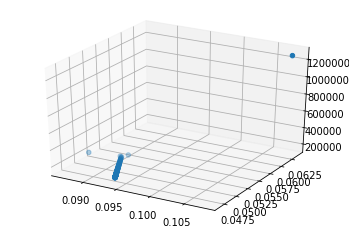

In [24]:
from mpl_toolkits import mplot3d
ax = plot.axes(projection ='3d')
ax.scatter(np.array(w1), np.array(w2), np.array(linear_loss))

### 5. Plotting training curve

Text(0.5, 1.0, 'Cement vs Concrete compressive Strength')

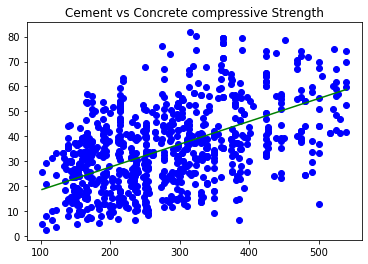

In [25]:
plot.scatter(X_train[:, 0], Y_train, color='b')
plot.plot([min(X_train[:, 0]), max(X_train[:, 0])], [min(Y_pred), max(Y_pred)], color='g')
plot.title("Cement vs Concrete compressive Strength")

Text(0.5, 1.0, 'Water vs Concrete compressive Strength')

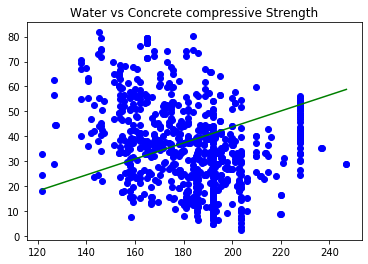

In [26]:
plot.scatter(X_train[:, 1], Y_train, color='b')
plot.plot([min(X_train[:, 1]), max(X_train[:, 1])], [min(Y_pred), max(Y_pred)], color='g')
plot.title("Water vs Concrete compressive Strength")

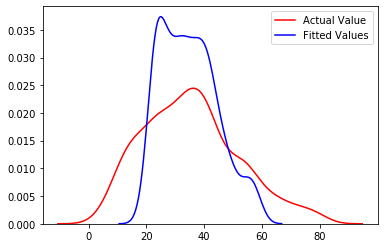

In [27]:
import seaborn as sns

ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

Text(0, 0.5, 'Predicted')

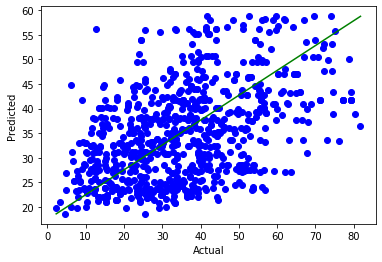

In [28]:
plot.scatter(Y_train, Y_pred, color='b')
plot.plot([min(Y_train), max(Y_train)], [min(Y_pred), max(Y_pred)], color='g')
plot.xlabel('Actual')
plot.ylabel('Predicted')

Text(0.5, 1.0, 'cost function vs no.of iterations')

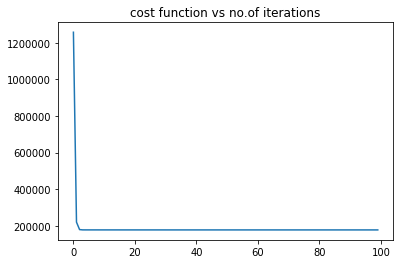

In [29]:
plot.plot(linear_loss)
plot.title("cost function vs no.of iterations")

### 6. Optimum value of weight vector and learning rate

In [30]:
intercept

array([0.00081205])

In [31]:
weight_vector

array([[0.09388648, 0.04679359]])

Learning rate = 1.e-5 = 0.00001
A greater learning rate like 0.01 is predicting very large values for y in the range -1.e+100
1.e-5 is giving a less error between the predicted and actual values.

### 7. Sample test cases and predicting

In [32]:
mtest.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
158,439.0,177.0,0.0,186.0,11.1,884.9,707.9,56,71.698609
753,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,28,67.306647


In [33]:
X_test = mtest.iloc[0:2, [0, 3]]
X_test

,Cement (component 1)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture)
158,439.0,186.0
753,540.0,173.0


In [34]:
Y = predict(weight_vector, np.array(X_test), intercept)
Y

array([[49.92058338],
       [58.79480102]])

### 8. Adding more data to training set

Taking the whole data set. Earlier the data was divided and only 80% of data was used.

In [35]:
X_train = df.iloc[:, [0, 3]]
Y_train = df.iloc[:, 8]

In [36]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [37]:
weight_vector, intercept, linear_loss, w1, w2 = gradient_descent(X_train, Y_train)

In [38]:
Y_pred_new = predict(weight_vector, X_train, intercept)

In [39]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y_train
df_pred["y_predicted"]=Y_pred_new
df_pred

,y_actual,y_predicted
0,79.986111,59.016284
1,61.887366,59.016284
2,40.269535,42.280649
3,41.052780,42.280649
4,44.296075,27.840196
...,...,...
1025,44.284354,34.687020
1026,31.178794,39.815636
1027,23.696601,23.093618
1028,32.768036,23.312533


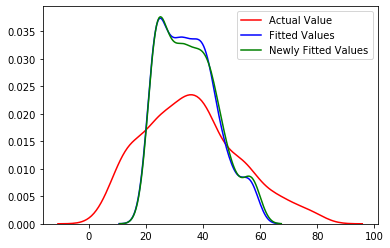

In [40]:
ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
sns.distplot(Y_pred_new, hist=False, color="g", label="Newly Fitted Values" , ax=ax1)

There's not much of change in the error between actual and predicted values even the dataset is made bigger.